<h1><font color="darkblue">Descriptive Statistics</font></h1>

### Data Sets

- For example, a set of $N$ scalar measurements 

> $\displaystyle \big\{x_i\big\}_{i=1}^N $

### How to characterize the data?
- Location
- Dispersion
- Shape?

### IPython/Jupyter Notebook
- Interactive data analysis made easy
- And here is how you do it:

In [1]:
# useful modules we'll always need
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [3]:
N = 1000;
x = np.random.randn(N);

In [4]:
# indexing from 0
print "%f, %f, ..., %f" % (x[0], x[1], x[N-1]) 

# last element
print "%f = %f" % (x[N-1], x[-1])

-0.904178, -0.103487, ..., 0.023141
0.023141 = 0.023141


In [5]:
range(5)

[0, 1, 2, 3, 4]

In [6]:
# index out of bounds
for i in range(N-3,N+1):
    print "%d :\t%r" % (i, x[i])

997 :	0.83387417417922571
998 :	-0.26401573136949691
999 :	0.023141079382829062


IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [7]:
# error handling with exceptions
for i in range(N-3,N+1):
    try: 
        print "%d : \t %r" % (i, x[i])
    except IndexError as err: 
        print err

997 : 	 0.83387417417922571
998 : 	 -0.26401573136949691
999 : 	 0.023141079382829062
index 1000 is out of bounds for axis 0 with size 1000


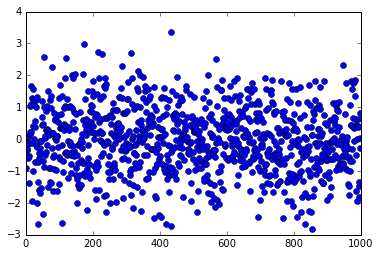

In [8]:
plt.plot(x,'bo');

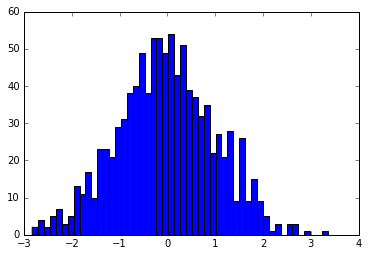

In [9]:
h = plt.hist(x,50)

###Location

- Mode 

> where it peaks

> unimodal vs multimodal

- Sample average

> $\displaystyle \bar{x} = \frac{1}{N} \sum_{i=1}^N x_i$

> but indexing starts with 0 in Python and most computer languages

> $\displaystyle \bar{x} = \frac{1}{N} \sum_{i=0}^{N-1} x_i$

- Median

> The number that separates the higher half of the set from the lower half


In [10]:
avg = np.sum(x) / N 
print "%r = %r" % (avg, np.mean(x))

-0.036091510347642262 = -0.036091510347642262


In [11]:
med = np.median(x)
print med

-0.0565285955328


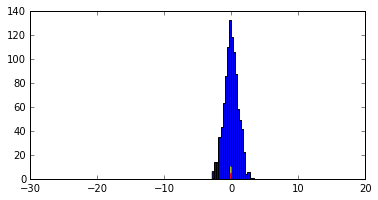

In [23]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)
ax.hist(x,20)
ax.arrow(avg,0,0,5,color='r')
ax.arrow(med,5,0,5,color='y')
ax.set_xlim(-30, 20);

### Dispersion
- Sample variance

> $\displaystyle s^2 = \frac{1}{N\!-\!1} \sum_{i=1}^N \left(x_i - \bar{x}\right)^2$

- Standard deviation

> $\displaystyle s = \sqrt{s^2}$

#### Unhomework
0. Why is $(N\!-\!1)$ in the denominator above?

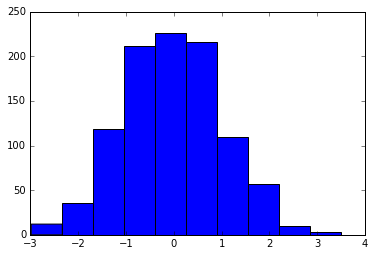

In [14]:
hist(x,10);

### Outliers
- What if just one element is too large, e.g., erroneously becomes $+\infty$
- Sample average $\bar{x} \rightarrow +\infty$
- Sample variance explodes, too

    **Ouch !!**


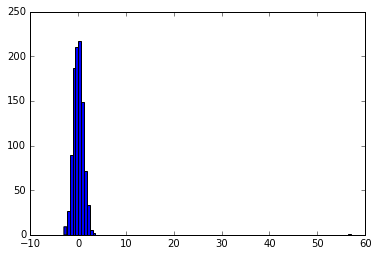

In [15]:
x[0] = 57
hist(x,100);

### Robustness
- Robust against outliers? What fraction can we tolerate?
- Median is more robust than the mean
- Median Absolute Deviation (MAD) for dispersion

In [16]:
x[0] = 1e9
print 'Average old vs new:', avg, mean(x)
print 'Median  old vs new:', med, median(x)

Average old vs new: -0.0258157821459 999999.97216
Median  old vs new: -0.0401585145884 -0.0401585145884


### Probability Density Function
- PDF a.k.a. Probability Distribution Density Function
- Probabiliy of $x$ between $a$ and $b$ for any $(a,b)$ is

> $\displaystyle P_{ab} = \int_a^b p(x)\,dx$

- Always 

> $\displaystyle  \int_{-\infty}^{\infty} p(x)\,dx = 1$


- Example 1: uniform distribution on $(a,b)$

> $\displaystyle  U(x;a,b) = \frac{\pmb{1}_{ab}(x)}{b\!-\!a} $,
> where $\pmb{1}_{ab}(x)$ is 1 between $a$ and $b$, but 0 otherwise

- Example 2: Gaussian or normal distribution

> $\displaystyle  G(x;\mu,\sigma) = \frac{{1}}{\sqrt{2\pi\sigma^2}}\ \exp\left[{-\frac{(x\!-\!\mu)^2}{\sigma^2} }\right]$

- Example 3: Log-normal

### Gauss on Money!

<!--
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/DEU-10m-anv.jpg/640px-DEU-10m-anv.jpg' width=400>
-->
<img src='files/640px-DEU-10m-anv.jpg' width=400 align=left>

- Even the formula

<img src='files/10DM.jpg' width=400 align=left>

### Cummulative Distribution Function
- Integral up to given $x$: prob of being less than $x$

> $\displaystyle \mathrm{CDF}(x) = \int_{-\infty}^{x} p(t)\,dt$

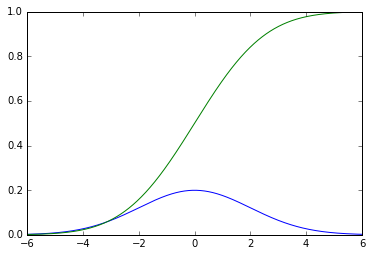

In [17]:
from scipy.stats import norm as gaussian
x = np.linspace(-6,6,1000) 
mu, sig = 0, 2
plot(x, gaussian.pdf(x,mu,sig));
plot(x, gaussian.cdf(x,mu,sig));

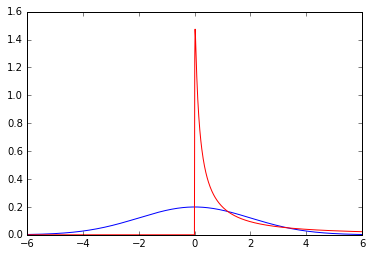

In [17]:
from scipy.stats import lognorm
plot(x, gaussian.pdf(x,0,sig));
plot(x, lognorm.pdf(x,sig), color='r');

### Characterization of PDFs

- Expectation value of $x$

> $\displaystyle \mu = \mathbb{E}[x] = \int_{-\infty}^{\infty}\! x\ p(x)dx$

- Expectation value of any $f(x)$

> $\displaystyle \mathbb{E}[f(x)] = \int_{-\infty}^{\infty}\! f(x)\ p(x)dx$

- Moments 

> $\displaystyle \mathbb{E}[x^k]$
    
- Central moments 

> $\displaystyle \mathbb{E}\big[(x\!-\!\mu)^k\big]$

- Variance

> $\displaystyle \mathbb{Var}[x] = \mathbb{E}\big[(x\!-\!\mu)^2\big]$

- Standard deviation

> $\displaystyle \sigma = \sqrt{\mathbb{Var}[x]}$

- Normalized moments

> $\displaystyle \mathbb{E}\left[\left(\frac{x\!-\!\mu}{\sigma}\right)^k\right]$

- Skewness

> 3rd normalized moment ($k$=3)

- Kurtosis

> 4th normalized moment ($k$=4)
 


<img src="files/skew_kurt.png" width=400 align=left>

In [18]:
mean, var, skew, kurt = gaussian.stats(mu, sig, moments='mvsk');
print mu, sig, '->', mean, var, skew, kurt

0 2 -> 0.0 4.0 0.0 0.0


In [19]:
mean, var, skew, kurt = lognorm.stats(sig, moments='mvsk');
print sig, '->', mean, var, skew, kurt

2 -> 7.38905609893 2926.35983701 414.3593433 9220556.97731


<h1><font color="darkblue">Python by Examples</font></h1>

- tuple list function class for map  lambda import

- numpy matplotlib 

In [20]:
# tuple
t = (1,2)
t = 100, 0.1
N, mu = t
print N

100


In [21]:
# list
l = [1,2,3,4,5]
print [l,l]

[[1, 2, 3, 4, 5], [1, 2, 3, 4, 5]]


In [22]:
# function
def f(x,k=2):
    return x**k

f(2,3)

8

In [19]:
import math

# object-oriented programming
class Robot(object):
    def __init__(self, x=0, y=0, angle=0):
        self.x, self.y, self.angle = x, y, angle
        self.path = [(x,y)]
    def move(self, l):
        self.x += l* math.cos(self.angle)
        self.y += l* math.sin(self.angle)
        self.path.append( (self.x, self.y) )
    def left(self, a):
        self.angle += a
    def right(self, a):
        self.left(-a)
        
r = Robot()
r.move(10)
r.left(math.pi/4)
r.move(5)
print r.path

[(0, 0), (10.0, 0.0), (13.535533905932738, 3.5355339059327373)]


In [24]:
# loops
for i in range(10):
    print i*i,

0 1 4 9 16 25 36 49 64 81


In [25]:
# mapping lists
map(f, range(10))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [26]:
# lambda expressions
g = lambda x: x*x
print g(2)

map(lambda x: x**3, range(10))

4


[0, 1, 8, 27, 64, 125, 216, 343, 512, 729]

In [27]:
x = [1,2,3,4,5]
y = map(f,x)
print x
print y

print zip(x,y)

map(lambda t: t[0]+t[1], zip(x,y))

[1, 2, 3, 4, 5]
[1, 4, 9, 16, 25]
[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]


[2, 6, 12, 20, 30]

In [28]:
# using math functions and routines
import math

print math.pi, math.sin(1.57)

3.14159265359 0.999999682932


In [29]:
# arrays: vectors and matrices
import numpy as np
l = [1,2,3]
a = np.array([l,l], dtype=np.int32)
print a.shape
print a.T

b = np.dot(a.T,a)
b

(2L, 3L)
[[1 1]
 [2 2]
 [3 3]]


array([[ 2,  4,  6],
       [ 4,  8, 12],
       [ 6, 12, 18]])

In [30]:
# slicing arrays
b[0:2,:3]

array([[ 2,  4,  6],
       [ 4,  8, 12]])

In [31]:
# componentwise operations
print np.sin(l)

map(math.sin, l)

[ 0.84147098  0.90929743  0.14112001]


[0.8414709848078965, 0.9092974268256817, 0.1411200080598672]

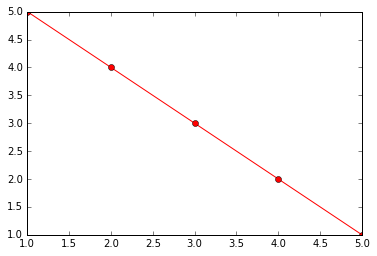

In [32]:
plt.plot([1,2,3,4,5],[5,4,3,2,1], 'ro-');
plt.savefig('test.pdf') 
# change extension to .png to have it in that format

In [1]:
seed?

Object `seed` not found.
